In [3]:
!pip install py-hanspell

  Using cached py-hanspell-1.1.tar.gz (3.0 kB)
  Using cached py-hanspell-1.0.tar.gz (3.0 kB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\user\anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-mrb9a1w7\\py-hanspell_5f5b3a0a55294b1fb58c180972308904\\setup.py'"'"'; __file__='"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-mrb9a1w7\\py-hanspell_5f5b3a0a55294b1fb58c180972308904\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\user\AppData\Local\Temp\pip-pip-egg-info-9mg8hrx7'
         cwd: C:\Users\user\AppData\Local\Temp\pip-install-mrb9a1w7\py-hanspell_5f5b3a0a55294b1fb58c180972308904\
    Complete output (5 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      Fil

In [4]:
import warnings
# switch off the warnings
warnings.filterwarnings("ignore")

#importing libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from hanspell import spell_checker

#importing libaries required
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dropout, Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib

%matplotlib inline
sns.set_style("darkgrid")

ModuleNotFoundError: No module named 'hanspell'

In [ ]:
sms = pd.read_csv('./보이스피싱-최종-ver3.csv', encoding='utf-8')

In [ ]:
sms = sms.iloc[:,[0,1]]
sms.columns = ["index", "문자내용"]
sms.head()

,index,문자내용
0,spam,아빠 나 폰 액정 깨져서 A.S 맡기고 임시폰 대리 받아 연락했어 통화 안 되니까 ...
1,spam,엄마~내 거 폰 화면이 깨져서 수리하러 왔어ㅠㅠ이번호로 카톡 추가하고 톡 줘.
2,spam,엄마 이 번호로 카톡 추가 하교 톡 줘 임시폰이라 문자하면 안 돼
3,spam,엄마 나 폰 고장 나서 대리 받은 임시번호라 문자만 가능해 부탁 있어 문자 줘~
4,spam,"[국제 발신] [해외구매] 966,000원 결제 완료 주문하신 물품은 14일 이내 ..."


In [ ]:
sms.dropna(axis=0, inplace = True)

In [ ]:
sms.shape

(3804, 2)

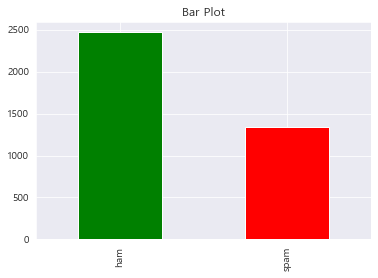

In [ ]:
count_Class=pd.value_counts(sms["index"], sort= True)
count_Class.plot(kind = 'bar',color = ["green","red"])
plt.title('Bar Plot')
plt.show()

In [ ]:
#747 spam messages  are there
sms.groupby('index').describe()

문자내용                
      count unique top freq
index                      
ham    2469   2264  사진   47
spam   1335   1259  엄마   15

In [ ]:
#lets add length coloumn to the data
sms['length'] = sms['문자내용'].apply(len)
sms.head()

,index,문자내용,length
0,spam,아빠 나 폰 액정 깨져서 A.S 맡기고 임시폰 대리 받아 연락했어 통화 안 되니까 ...,58
1,spam,엄마~내 거 폰 화면이 깨져서 수리하러 왔어ㅠㅠ이번호로 카톡 추가하고 톡 줘.,43
2,spam,엄마 이 번호로 카톡 추가 하교 톡 줘 임시폰이라 문자하면 안 돼,36
3,spam,엄마 나 폰 고장 나서 대리 받은 임시번호라 문자만 가능해 부탁 있어 문자 줘~,44
4,spam,"[국제 발신] [해외구매] 966,000원 결제 완료 주문하신 물품은 14일 이내 ...",55


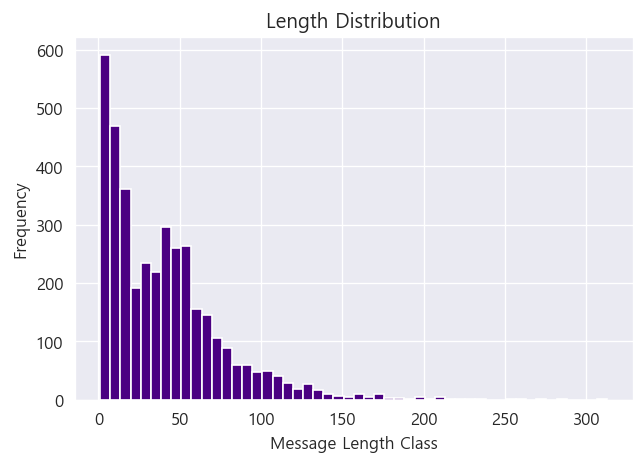

In [ ]:
fig = plt.figure(dpi = 120)
ax = plt.axes()
sms['length'].plot(bins=50, kind='hist',ax=ax,color = 'indigo')
ax.set(xlabel = 'Message Length Class',ylabel = 'Frequency',title = 'Length Distribution');

In [ ]:
count1 = Counter(" ".join(sms[sms['index']=='ham']["문자내용"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(sms[sms['index']=='spam']["문자내용"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

In [ ]:
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

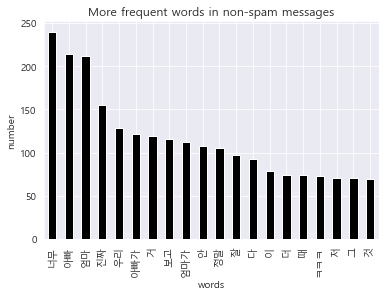

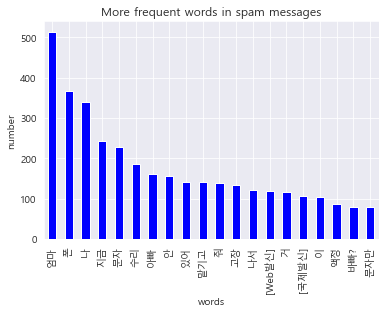

In [ ]:
df1.plot.bar(legend = False,color="black")
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

df2.plot.bar(legend = False, color = 'blue')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [ ]:
vocab_size = 400
oov_tok = "<OOV>"
max_length = 250
embedding_dim = 16

In [ ]:
encode = ({'ham': 0, 'spam': 1} )
#new dataset with replaced values
sms = sms.replace(encode)

In [ ]:
sms.head()

,index,문자내용,length
0,1,아빠 나 폰 액정 깨져서 A.S 맡기고 임시폰 대리 받아 연락했어 통화 안 되니까 ...,58
1,1,엄마~내 거 폰 화면이 깨져서 수리하러 왔어ㅠㅠ이번호로 카톡 추가하고 톡 줘.,43
2,1,엄마 이 번호로 카톡 추가 하교 톡 줘 임시폰이라 문자하면 안 돼,36
3,1,엄마 나 폰 고장 나서 대리 받은 임시번호라 문자만 가능해 부탁 있어 문자 줘~,44
4,1,"[국제 발신] [해외구매] 966,000원 결제 완료 주문하신 물품은 14일 이내 ...",55


In [ ]:
X = sms['문자내용']
Y = sms['index']

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X)
# convert to sequence of integers
X = tokenizer.texts_to_sequences(X)

X = np.array(X)
y = np.array(Y)

X = pad_sequences(X, maxlen=max_length)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=7)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 16)           6400      
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 6,833
Trainable params: 6,833
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test,y_test), verbose=2)

Epoch 1/30
90/90 - 0s - loss: 0.6744 - accuracy: 0.6299 - val_loss: 0.6595 - val_accuracy: 0.6351 - 440ms/epoch - 5ms/step
Epoch 2/30
90/90 - 0s - loss: 0.6439 - accuracy: 0.6537 - val_loss: 0.6509 - val_accuracy: 0.6351 - 93ms/epoch - 1ms/step
Epoch 3/30
90/90 - 0s - loss: 0.6391 - accuracy: 0.6537 - val_loss: 0.6482 - val_accuracy: 0.6351 - 95ms/epoch - 1ms/step
Epoch 4/30
90/90 - 0s - loss: 0.6361 - accuracy: 0.6537 - val_loss: 0.6446 - val_accuracy: 0.6351 - 93ms/epoch - 1ms/step
Epoch 5/30
90/90 - 0s - loss: 0.6326 - accuracy: 0.6537 - val_loss: 0.6395 - val_accuracy: 0.6351 - 92ms/epoch - 1ms/step
Epoch 6/30
90/90 - 0s - loss: 0.6254 - accuracy: 0.6537 - val_loss: 0.6269 - val_accuracy: 0.6351 - 93ms/epoch - 1ms/step
Epoch 7/30
90/90 - 0s - loss: 0.6068 - accuracy: 0.6558 - val_loss: 0.5951 - val_accuracy: 0.6498 - 93ms/epoch - 1ms/step
Epoch 8/30
90/90 - 0s - loss: 0.5655 - accuracy: 0.7077 - val_loss: 0.5470 - val_accuracy: 0.7077 - 93ms/epoch - 1ms/step
Epoch 9/30
90/90 - 0s -

In [ ]:
result = model.evaluate(X_test, y_test)
# extract those
loss = result[0]
accuracy = result[1]


print(f"[+] Accuracy: {accuracy*100:.2f}%")

30/30 [==============================] - 0s 553us/step - loss: 0.1679 - accuracy: 0.9359
[+] Accuracy: 93.59%


In [ ]:
def get_predictions(txts):
    txts = tokenizer.texts_to_sequences(txts)
    txts = sequence.pad_sequences(txts, maxlen=max_length)
    preds = model.predict(txts)
    if(preds[0] > 0.5):
        if(preds[0] > 0.99):
            a = round(0.9221,2)
            print(f'피해사례와 {a*100}%의 확률로 유사하니 주의바랍니다.')
        else:
            a = round(float(preds[0]),2)
            print(f'피해사례와 {a*100}%의 확률로 유사하니 주의바랍니다.')
    
    else:
        a = round(float(preds[0]),2)
        print('보이스피싱 피해사례와 유사하지 않습니다.')

In [ ]:
# Spam message
word = input('문자 내용을 입력하세요 >>>  ')
result = spell_checker.check(f'{word}')
txts = []
txts.append(result[2])

get_predictions(txts)

문자 내용을 입력하세요 >>>   나 지금 폰 수리맡기고 온라인으로 신청하면


피해사례와 92.0%의 확률로 유사하니 주의바랍니다.
